# EY Crop Forcasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/DataEY.csv',sep=';')

In [ ]:
df.head(5)

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),Bulan,NDVI,RVI
0,Chau_Thanh,10.446006,105.338972,WS,T,20/03/22,2.20,8000,3,0.531722,3.27096
1,Chau_Thanh,10.442271,105.339057,WS,T,20/03/22,2.53,7000,3,0.496914,2.97546
2,Chau_Thanh,10.439647,105.334052,WS,T,20/03/22,2.42,8000,3,0.427688,2.49460
3,Chau_Thanh,10.444036,105.331928,WS,T,20/03/22,2.42,7200,3,0.347162,2.06355
4,Chau_Thanh,10.443677,105.348236,WS,T,20/03/22,1.76,7040,3,0.460494,2.70709


In [ ]:
df.drop(['Bulan'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['District', 'Latitude', 'Longitude',
       'Season(SA = Summer Autumn, WS = Winter Spring',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest',
       'Field size (ha)', 'Rice Yield (kg/ha)', 'NDVI', 'RVI'],
      dtype='object')

<Axes: xlabel='NDVI', ylabel='Count'>

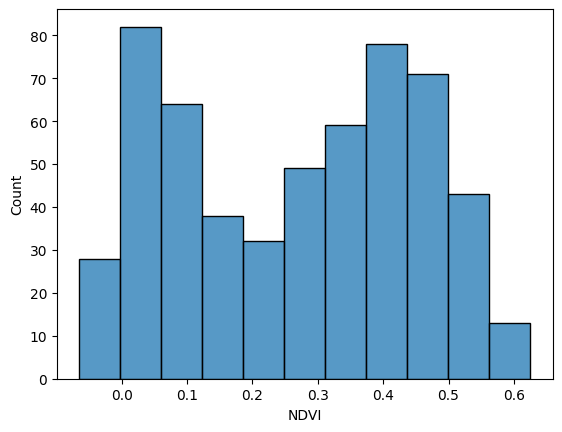

In [ ]:
sns.histplot(x='NDVI',data=df)

<Axes: xlabel='RVI', ylabel='Count'>

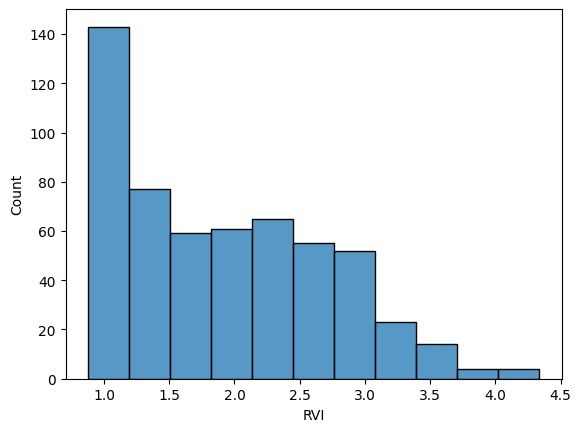

In [ ]:
sns.histplot(x='RVI',data=df)

In [ ]:
df.columns

Index(['Latitude', 'Longitude',
       'Season(SA = Summer Autumn, WS = Winter Spring',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest',
       'Field size (ha)', 'Rice Yield (kg/ha)', 'Bulan', 'NDVI', 'RVI',
       'Chau_Phu', 'Chau_Thanh', 'Thoai_Son', 'day', 'month', 'year'],
      dtype='object')

# Feature Selection

## Correlation

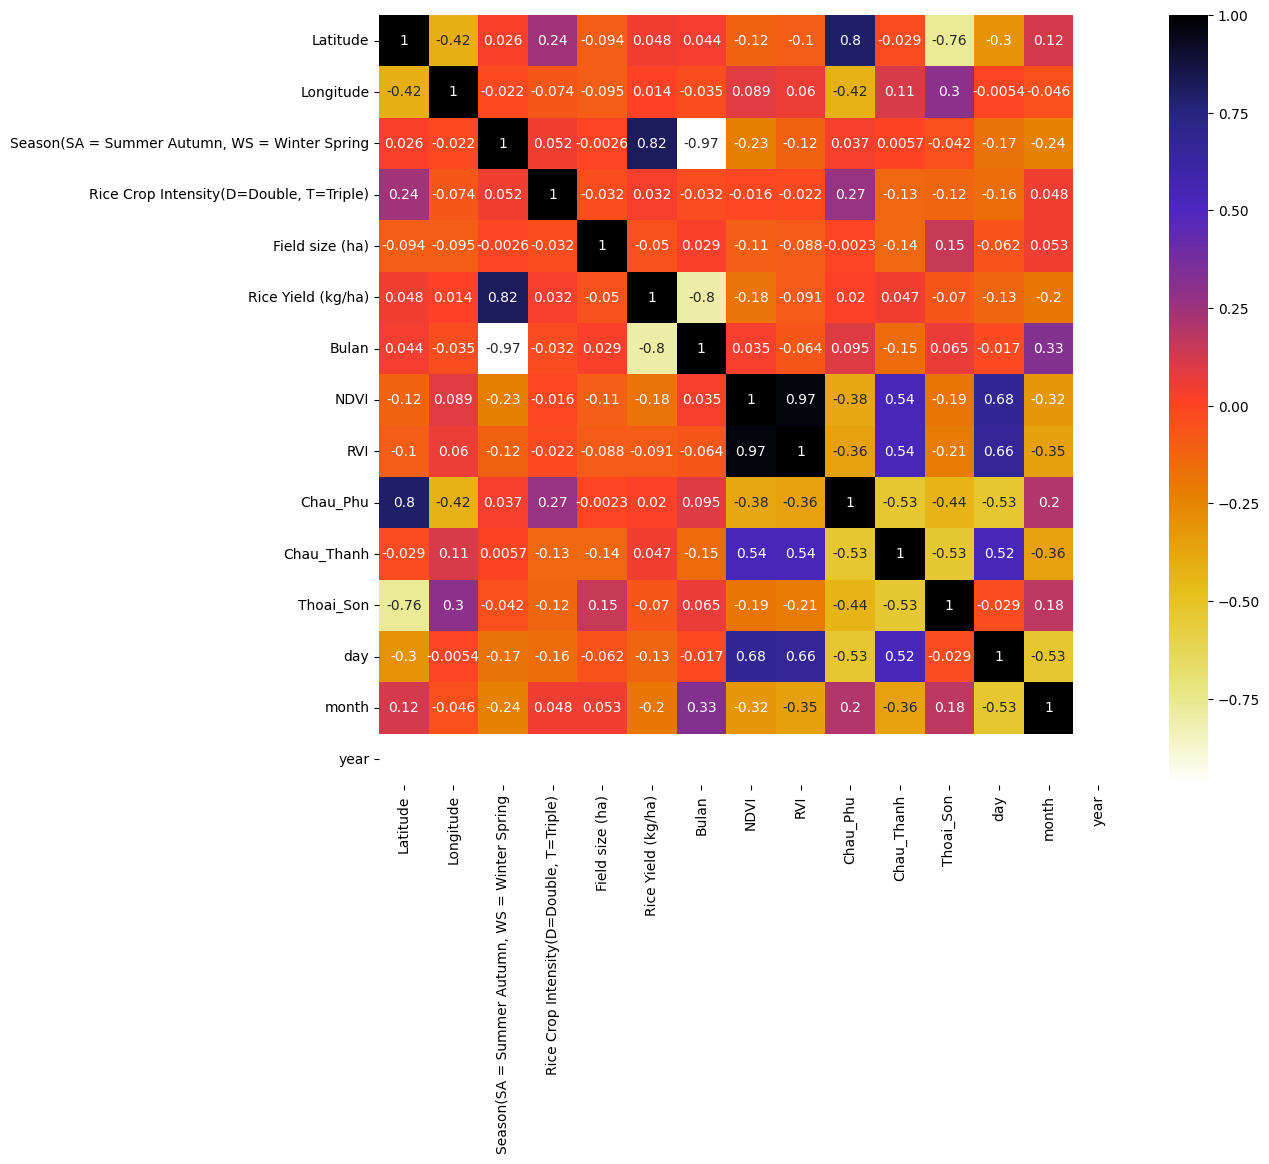

In [ ]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()  
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
  col_corr.add(colname)
  return col_corr 

In [ ]:
correlation(df, 0.7)

{'RVI'}

In [ ]:
X_train = X[:390]
X_test = X[390:557]
Y_train = Y[:390]
Y_test = Y[390:557]

## Mutual Info Classification

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Bulan         0.797813
Season        0.790388
month         0.747015
day           0.417088
Latitude      0.319904
year          0.254473
Thoai_Son     0.235988
NDVI          0.168186
Chau_Thanh    0.148087
FieldSize     0.038480
Chau_Phu      0.026435
Longitude     0.015920
RiceCrop      0.000000
dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Latitude', 'Season', 'Bulan', 'NDVI', 'Chau_Phu', 'Chau_Thanh',
       'Thoai_Son', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df.columns

Index(['Latitude', 'Longitude',
       'Season(SA = Summer Autumn, WS = Winter Spring',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest',
       'Field size (ha)', 'Rice Yield (kg/ha)', 'Bulan', 'NDVI', 'RVI',
       'Chau_Phu', 'Chau_Thanh', 'Thoai_Son', 'day', 'month', 'year'],
      dtype='object')

## Voting Classifier

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, Y)
Y_pred =rf.predict(X)

In [ ]:
from pandas import DataFrame
VI = DataFrame(rf.feature_importances_, columns = ["RF"], index=X.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
5,Bulan,0.357087
2,Season,0.315646
0,Latitude,0.080908
1,Longitude,0.077844
6,NDVI,0.077756
4,FieldSize,0.054042
10,day,0.015758
11,month,0.009112
3,RiceCrop,0.006168
9,Thoai_Son,0.002962


### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10, step=10)
fit = rfe.fit(X,Y)
Selected = pd.DataFrame(rfe.support_, columns = ["RFE"], index=X.columns)
Selected = Selected.reset_index()
Selected[Selected['RFE'] == True]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,index,RFE
0,Latitude,True
2,Season,True
3,RiceCrop,True
4,FieldSize,True
5,Bulan,True
7,Chau_Phu,True
8,Chau_Thanh,True
9,Thoai_Son,True
10,day,True
11,month,True


## Extratrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, Y)

print(model.feature_importances_)

[0.0581044  0.06766676 0.47780902 0.00567526 0.06221964 0.20058858
 0.06794583 0.00579338 0.00406101 0.00884324 0.02593717 0.0153557
 0.        ]


In [ ]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=X.columns)

In [ ]:
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
2,Season,0.477809
5,Bulan,0.200589
6,NDVI,0.067946
1,Longitude,0.067667
4,FieldSize,0.062220
0,Latitude,0.058104
10,day,0.025937
11,month,0.015356
9,Thoai_Son,0.008843
7,Chau_Phu,0.005793


## L1

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc,prefit=True)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=X.columns)
l1 = l1.reset_index()

In [ ]:
l1[l1['L1'] == True]

,index,L1
1,Longitude,True
5,Bulan,True
9,Thoai_Son,True
10,day,True
11,month,True
12,year,True


## Create Dataframe

In [ ]:
from functools import reduce
dfs = [VI, Selected, FI, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [ ]:
columns = ['RF', 'Extratrees']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [ ]:
score_table['final_score'] = score_table.sum(axis=1)

<ipython-input-501-66c485fd1ee9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score_table['final_score'] = score_table.sum(axis=1)


In [ ]:
score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,RFE,L1,final_score
5,Bulan,1,1,1,1,4
1,Longitude,1,1,0,1,3
2,Season,1,1,1,0,3
0,Latitude,1,0,1,0,2
4,FieldSize,0,1,1,0,2
6,NDVI,1,1,0,0,2
9,Thoai_Son,0,0,1,1,2
10,day,0,0,1,1,2
11,month,0,0,1,1,2
3,RiceCrop,0,0,1,0,1


## VIF

In [ ]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
 def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)
X = X[list(score_table[score_table['final_score'] >= 2]['index'])]

In [ ]:
vif = calculate_vif(X)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    X.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(X)

In [ ]:
list(vif['Features'])

['Season', 'FieldSize', 'NDVI', 'Thoai_Son', 'day', 'month']

# Encoding

In [ ]:
df = pd.read_csv('/content/DataEY.csv',sep=';')

In [ ]:
df = df[~(df['NDVI']==0)]

In [ ]:
df['District'].unique()

array(['Chau_Thanh', 'Thoai_Son', 'Chau_Phu'], dtype=object)

In [ ]:
df['Season(SA = Summer Autumn, WS = Winter Spring'].unique()

array(['WS', 'SA'], dtype=object)

In [ ]:
df['Rice Crop Intensity(D=Double, T=Triple)'].unique()

array(['T', 'D'], dtype=object)

## One Hot Encode

In [ ]:
def one_hot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
df = one_hot_encode(df,['District'])

## Label Encoding

In [ ]:
def binary_encode(df_clean, columns, positive_label):
    df_clean = df_clean.copy()
    for column in columns:
        df_clean[column] = df_clean[column].apply(lambda x: 1 if x == positive_label else 0)
    return df_clean

In [ ]:
df = binary_encode(df,['Season(SA = Summer Autumn, WS = Winter Spring'],'WS')

In [ ]:
df = binary_encode(df,['Rice Crop Intensity(D=Double, T=Triple)'],'D')

In [ ]:
df

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),Bulan,NDVI,RVI,Chau_Phu,Chau_Thanh,Thoai_Son
0,10.446006,105.338972,1,0,20/03/22,2.20,8000,3,0.531722,3.270960,0,1,0
1,10.442271,105.339057,1,0,20/03/22,2.53,7000,3,0.496914,2.975460,0,1,0
2,10.439647,105.334052,1,0,20/03/22,2.42,8000,3,0.427688,2.494600,0,1,0
3,10.444036,105.331928,1,0,20/03/22,2.42,7200,3,0.347162,2.063550,0,1,0
4,10.443677,105.348236,1,0,20/03/22,1.76,7040,3,0.460494,2.707090,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,10.354744,105.336739,0,0,04/08/22,1.60,5500,8,0.009833,1.019860,0,1,0
553,10.380450,105.349866,0,0,04/08/22,2.50,5500,8,0.019394,1.039560,0,1,0
554,10.374447,105.330923,0,0,04/08/22,3.20,6500,8,0.073260,1.158100,0,1,0
555,10.363786,105.288188,0,0,04/08/22,2.80,6000,8,0.016973,1.034530,0,1,0


## Date Encode

In [ ]:
import datetime as dt

In [ ]:
df['Date of Harvest'] = pd.to_datetime(df['Date of Harvest'])

In [ ]:
df['day'] = df['Date of Harvest'].dt.day

In [ ]:
df['month'] = df['Date of Harvest'].dt.month

In [ ]:
df['year'] = df['Date of Harvest'].dt.year

# Modeling

## Preparation

In [ ]:
df.columns

Index(['Latitude', 'Longitude',
       'Season(SA = Summer Autumn, WS = Winter Spring',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest',
       'Field size (ha)', 'Rice Yield (kg/ha)', 'Bulan', 'NDVI', 'RVI',
       'Chau_Phu', 'Chau_Thanh', 'Thoai_Son', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df = df.sort_values('Date of Harvest')

In [ ]:
Y = df['Rice Yield (kg/ha)']
#X = df.drop(['Date of Harvest','Rice Yield (kg/ha)','RVI'],axis=1)
#X = df.drop(['Date of Harvest','Rice Yield (kg/ha)','RVI','NDVI'],axis=1)
X = df[['Season(SA = Summer Autumn, WS = Winter Spring', 'Field size (ha)', 'NDVI', 'Thoai_Son', 'day', 'month']] 

In [ ]:
X.columns

Index(['Season(SA = Summer Autumn, WS = Winter Spring', 'Field size (ha)',
       'NDVI', 'Thoai_Son', 'day', 'month'],
      dtype='object')

In [ ]:
X = X.rename(columns={'Season(SA = Summer Autumn, WS = Winter Spring':'Season','Rice Crop Intensity(D=Double, T=Triple)':'RiceCrop','Field size (ha)':'FieldSize'})


In [ ]:
X_train = X[:390]
X_test = X[390:557]
Y_train = Y[:390]
Y_test = Y[390:557]

## Data Modelling

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
Y_pred_train = lr.predict(X_train)

In [ ]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

lrtest = r2_score(Y_test,Y_pred)
print('Score Model ->',lrtest)

lrtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',lrtrain)

lrmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',lrmae)

lrmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',lrmse)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

adjusted_r_squared = 1 - (1-lrtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

lrtest = r2_score(Y_test,Y_pred)
lrover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',lrover)

Score Model -> 0.4659787656049029
Score Train -> 0.7062263398595563
MAE -> 450.42072896149233
MSE -> 312261.1456369273
RMSE -> 558.8033156996541
Adjusted R2 -> 0.4601424679612407
Indication Overfitting -> 0.24024757425465337


### Lasso

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train, Y_train)
Y_pred=ls.predict(X_test)
Y_pred_train = ls.predict(X_train)

In [ ]:
# Evaluation

lstest = r2_score(Y_test,Y_pred)
print('Score Model ->',lstest)

lstrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',lstrain)

lsmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',lsmae)

lsmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',lsmse)

lsrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lsrmse)

adjusted_r_squared = 1 - (1-lstest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

lstest = r2_score(Y_test,Y_pred)
lsover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',lsover)

Score Model -> 0.442528177510334
Score Train -> 0.7060568208503921
MAE -> 460.3532802852778
MSE -> 325973.53576793853
RMSE -> 570.9409214340294
Adjusted R2 -> 0.43643558928640325
Indication Overfitting -> 0.2635286433400581


### Ridge

In [ ]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(X_train, Y_train)
Y_pred=rg.predict(X_test)
Y_pred_train = rg.predict(X_train)

In [ ]:
# Evaluation

rgtest = r2_score(Y_test,Y_pred)
print('Score Model ->',rgtest)

rgtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rgtrain)

rgmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rgmae)

rgmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rgmse)

rgrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rgrmse)

adjusted_r_squared = 1 - (1-rgtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rgtest = r2_score(Y_test,Y_pred)
rgover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rgover)


Score Model -> 0.353819293457005
Score Train -> 0.7058196668377255
MAE -> 493.1275973234756
MSE -> 377844.7648100625
RMSE -> 614.6907879658378
Adjusted R2 -> 0.3467572092324913
Indication Overfitting -> 0.35200037338072043


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(X_train, Y_train)
Y_pred =dc.predict(X_test)
Y_pred_train = dc.predict(X_train)

In [ ]:
# Evaluation

dctest = r2_score(Y_test,Y_pred)
print('Score Model ->',dctest)

dctrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',dctrain)

dcmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',dcmae)

dcmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',dcmse)

dcrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',dcrmse)

adjusted_r_squared = 1 - (1-dctest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

dctest = r2_score(Y_test,Y_pred)
dcover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',dcover)

Score Model -> 0.11234082853750738
Score Train -> 1.0
MAE -> 566.7469879518072
MSE -> 519045.7831325301
RMSE -> 720.4483209311617
Adjusted R2 -> 0.10263963540676979
Indication Overfitting -> 0.8876591714624926


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred =rf.predict(X_test)
Y_pred_train = rf.predict(X_train)

In [ ]:
# Evaluation

rftest = r2_score(Y_test,Y_pred)
print('Score Model ->',rftest)

rftrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rftrain)

rfmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rfmae)

rfmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rfmse)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

adjusted_r_squared = 1 - (1-rftest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rftest = r2_score(Y_test,Y_pred)
rfover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rfover)

Score Model -> 0.5084305542379834
Score Train -> 0.948792700347196
MAE -> 439.10843373493975
MSE -> 287438.08
RMSE -> 536.1325209311593
Adjusted R2 -> 0.5030582105684531
Indication Overfitting -> 0.44036214610921254


### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, Y_train)
Y_pred =ab.predict(X_test)
Y_pred_train = ab.predict(X_train)

In [ ]:
# Evaluation

abtest = r2_score(Y_test,Y_pred)
print('Score Model ->',abtest)

abtrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',abtrain)

abmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',abmae)

abmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',abmse)

abrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',abrmse)

adjusted_r_squared = 1 - (1-abtest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

abtest = r2_score(Y_test,Y_pred)
abover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Oveabitting ->',abover)

Score Model -> 0.5839292076085245
Score Train -> 0.7244137559377005
MAE -> 399.0020986127858
MSE -> 243291.34111192022
RMSE -> 493.24572082474293
Adjusted R2 -> 0.5793819858337543
Indication Oveabitting -> 0.140484548329176


### Light Gradient Boost

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)
Y_pred =model.predict(X_test)
Y_pred_train = model.predict(X_train)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 616.455	valid_0's l2: 562496
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 581.853	valid_0's l2: 507415
[3]	valid_0's l1: 552.303	valid_0's l2: 455848
[4]	valid_0's l1: 532.712	valid_0's l2: 422072
[5]	valid_0's l1: 512.152	valid_0's l2: 387433
[6]	valid_0's l1: 496.976	valid_0's l2: 364301
[7]	valid_0's l1: 483.197	valid_0's l2: 341227
[8]	valid_0's l1: 474.151	valid_0's l2: 326202
[9]	valid_0's l1: 463.154	valid_0's l2: 311026
[10]	valid_0's l1: 456.473	valid_0's l2: 301344
[11]	valid_0's l1: 447.873	valid_0's l2: 290832
[12]	valid_0's l1: 440.558	valid_0's l2: 281863
[13]	valid_0's l1: 436.378	valid_0's l2: 277137
[14]	valid_0's l1: 430.78	valid_0's l2: 271124
[15]	valid_0's l1: 428.276	valid_0's l2: 268226
[16]	valid_0's l1: 423.284	valid_0's l2: 264363
[17]	valid_0's l1: 420.276	valid_0's l2: 262161
[18]	valid_0's l1: 416.988	valid_0's l2: 259441
[19]	valid_0's l1: 416.197	vali

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
# Evaluation

modeltest = r2_score(Y_test,Y_pred)
print('Score Model ->',modeltest)

modeltrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',modeltrain)

modelmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',modelmae)

modelmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',modelmse)

modelrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',modelrmse)

adjusted_r_squared = 1 - (1-modeltest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

modeltest = r2_score(Y_test,Y_pred)
modelover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Ovemodelitting ->',modelover)


Score Model -> 0.5647984924703553
Score Train -> 0.7579856450116059
MAE -> 408.48498736321034
MSE -> 254477.74839526557
RMSE -> 504.45787573915976
Adjusted R2 -> 0.560042191841616
Indication Ovemodelitting -> 0.19318715254125063


# Evaluation and Hyperparameter Tuning

In [ ]:
df_eval = pd.DataFrame({'model':['linear','lasso','ridge','decission tree','random forest','ada boost','xgb lightgbm'],
                        'r2':[lrtest,lstest,rgtest,dctest,rftest,abtest,modeltest],
                       'MAE':[lrmae,lsmae,rgmae,dcmae,rfmae,abmae,modelmae],
                       'MSE':[lrmse,lsmse,rgmse,dcmse,rfmse,abmse,modelmse],
                       'RMSE':[lrrmse,lsrmse,rgrmse,dcrmse,rfrmse,abrmse,modelrmse],
                       'Indication Ovefitting':[lrover,lsover,rgover,dcover,rfover,abover,modelover]})
df_eval

,model,r2,MAE,MSE,RMSE,Indication Ovefitting
0,linear,0.465979,450.420729,312261.145637,558.803316,0.240248
1,lasso,0.442528,460.353280,325973.535768,570.940921,0.263529
2,ridge,0.353819,493.127597,377844.764810,614.690788,0.352000
3,decission tree,0.112341,566.746988,519045.783133,720.448321,0.887659
4,random forest,0.508431,439.108434,287438.080000,536.132521,0.440362
5,ada boost,0.583929,399.002099,243291.341112,493.245721,0.140485
6,xgb lightgbm,0.564798,408.484987,254477.748395,504.457876,0.193187


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 12, n_estimators= 100)
rf.fit(X_train, Y_train)
Y_pred =rf.predict(X_test)
Y_pred_train = rf.predict(X_train)

In [ ]:
# Evaluation

rftest = r2_score(Y_test,Y_pred)
print('Score Model ->',rftest)

rftrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rftrain)

rfmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rfmae)

rfmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rfmse)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

adjusted_r_squared = 1 - (1-rftest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rftest = r2_score(Y_train,Y_pred_train)
rfover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rfover)

Score Model -> 0.44418080468664145
Score Train -> 0.8090228165823783
MAE -> 457.46907628353574
MSE -> 315145.62934013666
RMSE -> 561.3783299523919
Adjusted R2 -> 0.4308738994581448
Indication Overfitting -> 0.36484201189573684


# Preparation Test

In [ ]:
test = pd.read_csv('/content/submission.csv',sep=';')

In [ ]:
test.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),GNDVI,NDVI,RVI,Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10/04/22,1.40,NaN,NaN,NaN,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15/07/22,1.32,NaN,NaN,NaN,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14/07/22,1.40,NaN,NaN,NaN,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10/04/22,1.80,NaN,NaN,NaN,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20/07/22,2.20,NaN,NaN,NaN,NaN


In [ ]:
test.drop('ID No',axis=1,inplace=True)

## Encoding

## One Hot Encode

In [ ]:
def one_hot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
test = one_hot_encode(test,['District'])

## Label Encoding

In [ ]:
def binary_encode(df_clean, columns, positive_label):
    df_clean = df_clean.copy()
    for column in columns:
        df_clean[column] = df_clean[column].apply(lambda x: 1 if x == positive_label else 0)
    return df_clean

In [ ]:
test = binary_encode(test,['Season(SA = Summer Autumn, WS = Winter Spring)'],'WS')

In [ ]:
test = binary_encode(test,['Rice Crop Intensity(D=Double, T=Triple)'],'D')

In [ ]:
test

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),GNDVI,NDVI,RVI,Predicted Rice Yield (kg/ha),Chau_Phu,Chau_Thanh,Thoai_Son
0,10.542192,105.187920,1,0,10/04/22,1.40,NaN,NaN,NaN,NaN,1,0,0
1,10.400189,105.331053,0,0,15/07/22,1.32,NaN,NaN,NaN,NaN,0,1,0
2,10.505489,105.203926,0,1,14/07/22,1.40,NaN,NaN,NaN,NaN,1,0,0
3,10.523520,105.138274,1,1,10/04/22,1.80,NaN,NaN,NaN,NaN,1,0,0
4,10.294660,105.248528,0,0,20/07/22,2.20,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.435839,105.132981,0,1,26/07/22,1.21,NaN,NaN,NaN,NaN,0,1,0
96,10.529357,105.147388,1,0,10/04/22,2.00,NaN,NaN,NaN,NaN,1,0,0
97,10.452537,105.205118,0,0,20/07/22,5.50,NaN,NaN,NaN,NaN,0,1,0
98,10.394341,105.126836,0,0,14/07/22,4.40,NaN,NaN,NaN,NaN,0,1,0


In [ ]:
X

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring",RiceCrop,FieldSize,GNDVI,NDVI,RVI,Chau_Phu,Chau_Thanh,Thoai_Son,day,month,year
131,10.482003,105.203866,1,0,3.00,0.026555,0.039098,1.08138,1,0,0,4,1,2022
122,10.510542,105.248554,1,0,3.40,0.033034,0.018331,1.03735,1,0,0,4,1,2022
123,10.509150,105.265098,1,0,2.43,0.106735,0.104986,1.23460,1,0,0,4,1,2022
124,10.501829,105.273585,1,0,3.50,0.083300,0.088070,1.19315,1,0,0,4,1,2022
145,10.524439,105.254678,1,1,4.00,0.092803,0.112289,1.25299,1,0,0,4,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10.303700,105.354593,0,0,4.00,0.407745,0.371429,2.18182,0,0,1,7,12,2022
444,10.314233,105.359823,0,1,1.52,0.449718,0.470063,2.77404,0,0,1,7,12,2022
445,10.303437,105.381252,0,0,2.10,0.008369,0.026832,1.05514,0,0,1,7,12,2022
439,10.342970,105.382435,0,1,1.87,0.291405,0.283811,1.79256,0,0,1,7,12,2022


## Date Encode

In [ ]:
import datetime as dt

In [ ]:
test['Date of Harvest'] = pd.to_datetime(test['Date of Harvest'])

In [ ]:
test['day'] = test['Date of Harvest'].dt.day

In [ ]:
test['month'] = test['Date of Harvest'].dt.month

In [ ]:
test['year'] = test['Date of Harvest'].dt.year

In [ ]:
test.columns

In [ ]:
X

In [ ]:
test.drop(['Predicted Rice Yield (kg/ha)'], axis=1, inplace=True)


In [ ]:
if 'Predicted Rice Yield (kg/ha)' in test.columns:
    test.drop(['Predicted Rice Yield (kg/ha)'], axis=1, inplace=True)
else:
    print("Column not found in DataFrame.")

In [ ]:
test = test.rename(columns={'Season(SA = Summer Autumn, WS = Winter Spring)':'Season(SA = Summer Autumn, WS = Winter Spring','Rice Crop Intensity(D=Double, T=Triple)':'RiceCrop','Field size (ha)':'FieldSize'})


In [ ]:
test

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)",RiceCrop,Date of Harvest,FieldSize,GNDVI,NDVI,RVI,Predicted Rice Yield (kg/ha),Chau_Phu,Chau_Thanh,Thoai_Son,day,month,year
0,10.542192,105.187920,1,0,2022-10-04,1.40,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
1,10.400189,105.331053,0,0,2022-07-15,1.32,NaN,NaN,NaN,NaN,0,1,0,15,7,2022
2,10.505489,105.203926,0,1,2022-07-14,1.40,NaN,NaN,NaN,NaN,1,0,0,14,7,2022
3,10.523520,105.138274,1,1,2022-10-04,1.80,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
4,10.294660,105.248528,0,0,2022-07-20,2.20,NaN,NaN,NaN,NaN,0,0,1,20,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.435839,105.132981,0,1,2022-07-26,1.21,NaN,NaN,NaN,NaN,0,1,0,26,7,2022
96,10.529357,105.147388,1,0,2022-10-04,2.00,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
97,10.452537,105.205118,0,0,2022-07-20,5.50,NaN,NaN,NaN,NaN,0,1,0,20,7,2022
98,10.394341,105.126836,0,0,2022-07-14,4.40,NaN,NaN,NaN,NaN,0,1,0,14,7,2022


In [ ]:
test.drop('Date of Harvest', axis=1, inplace=True)

In [ ]:
test

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)",RiceCrop,FieldSize,GNDVI,NDVI,RVI,Predicted Rice Yield (kg/ha),Chau_Phu,Chau_Thanh,Thoai_Son,day,month,year
0,10.542192,105.187920,1,0,1.40,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
1,10.400189,105.331053,0,0,1.32,NaN,NaN,NaN,NaN,0,1,0,15,7,2022
2,10.505489,105.203926,0,1,1.40,NaN,NaN,NaN,NaN,1,0,0,14,7,2022
3,10.523520,105.138274,1,1,1.80,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
4,10.294660,105.248528,0,0,2.20,NaN,NaN,NaN,NaN,0,0,1,20,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.435839,105.132981,0,1,1.21,NaN,NaN,NaN,NaN,0,1,0,26,7,2022
96,10.529357,105.147388,1,0,2.00,NaN,NaN,NaN,NaN,1,0,0,4,10,2022
97,10.452537,105.205118,0,0,5.50,NaN,NaN,NaN,NaN,0,1,0,20,7,2022
98,10.394341,105.126836,0,0,4.40,NaN,NaN,NaN,NaN,0,1,0,14,7,2022


In [ ]:
X

,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring",RiceCrop,FieldSize,GNDVI,NDVI,RVI,Chau_Phu,Chau_Thanh,Thoai_Son,day,month,year
131,10.482003,105.203866,1,0,3.00,0.026555,0.039098,1.08138,1,0,0,4,1,2022
122,10.510542,105.248554,1,0,3.40,0.033034,0.018331,1.03735,1,0,0,4,1,2022
123,10.509150,105.265098,1,0,2.43,0.106735,0.104986,1.23460,1,0,0,4,1,2022
124,10.501829,105.273585,1,0,3.50,0.083300,0.088070,1.19315,1,0,0,4,1,2022
145,10.524439,105.254678,1,1,4.00,0.092803,0.112289,1.25299,1,0,0,4,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10.303700,105.354593,0,0,4.00,0.407745,0.371429,2.18182,0,0,1,7,12,2022
444,10.314233,105.359823,0,1,1.52,0.449718,0.470063,2.77404,0,0,1,7,12,2022
445,10.303437,105.381252,0,0,2.10,0.008369,0.026832,1.05514,0,0,1,7,12,2022
439,10.342970,105.382435,0,1,1.87,0.291405,0.283811,1.79256,0,0,1,7,12,2022


# Final Predicted

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred =rf.predict(X_test)
Y_pred_train = rf.predict(X_train)

In [ ]:
# Evaluation

rftest = r2_score(Y_test,Y_pred)
print('Score Model ->',rftest)

rftrain = r2_score(Y_train,Y_pred_train)
print('Score Train ->',rftrain)

rfmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',rfmae)

rfmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',rfmse)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

adjusted_r_squared = 1 - (1-rftest)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

rftest = r2_score(Y_train,Y_pred_train)
rfover = r2_score(Y_train,Y_pred_train) - r2_score(Y_test,Y_pred)  
print('Indication Overfitting ->',rfover)

Score Model -> 0.5479161500174516
Score Train -> 0.9512160859792071
MAE -> 405.9580838323353
MSE -> 256328.4079041916
RMSE -> 506.2888581671451
Adjusted R2 -> 0.5362387073979762
Indication Overfitting -> 0.4032999359617555


## Evaluation

In [ ]:
test.columns

In [ ]:
final = pd.read_csv('/content/DataEY.csv',sep=';')

In [ ]:
final['Predicted Rice Yield (kg/ha)'] = rf.predict(test)

ValueError: ignored

In [ ]:
X.dropna(inplace=True)

In [ ]:
final

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),Bulan,GNDVI,NDVI,RVI
0,Chau_Thanh,10.446006,105.338972,WS,T,20/03/22,2.20,8000,3,0.470405,0.531722,3.270960
1,Chau_Thanh,10.442271,105.339057,WS,T,20/03/22,2.53,7000,3,0.429892,0.496914,2.975460
2,Chau_Thanh,10.439647,105.334052,WS,T,20/03/22,2.42,8000,3,0.443896,0.427688,2.494600
3,Chau_Thanh,10.444036,105.331928,WS,T,20/03/22,2.42,7200,3,0.330458,0.347162,2.063550
4,Chau_Thanh,10.443677,105.348236,WS,T,20/03/22,1.76,7040,3,0.406659,0.460494,2.707090
...,...,...,...,...,...,...,...,...,...,...,...,...
552,Chau_Thanh,10.354744,105.336739,SA,T,04/08/22,1.60,5500,8,0.034824,0.009833,1.019860
553,Chau_Thanh,10.380450,105.349866,SA,T,04/08/22,2.50,5500,8,0.049114,0.019394,1.039560
554,Chau_Thanh,10.374447,105.330923,SA,T,04/08/22,3.20,6500,8,0.085391,0.073260,1.158100
555,Chau_Thanh,10.363786,105.288188,SA,T,04/08/22,2.80,6000,8,0.058276,0.016973,1.034530


In [ ]:
final.to_csv('submission_4.csv',index=False)

In [ ]:
X

In [ ]:
test